In [1]:
from netCDF4 import Dataset
from wrf import getvar, get_cartopy, latlon_coords, geo_bounds

In [33]:
data1=Dataset('/mnt/e/wrf_tibet/test/china/geo_em.d01.nc')
data2=Dataset('/mnt/e/wrf_tibet/test/china/geo_em.d02.nc')
data2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE: OUTPUT FROM GEOGRID V4.2
    SIMULATION_START_DATE: 0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION: 112
    SOUTH-NORTH_GRID_DIMENSION: 97
    BOTTOM-TOP_GRID_DIMENSION: 0
    WEST-EAST_PATCH_START_UNSTAG: 1
    WEST-EAST_PATCH_END_UNSTAG: 111
    WEST-EAST_PATCH_START_STAG: 1
    WEST-EAST_PATCH_END_STAG: 112
    SOUTH-NORTH_PATCH_START_UNSTAG: 1
    SOUTH-NORTH_PATCH_END_UNSTAG: 96
    SOUTH-NORTH_PATCH_START_STAG: 1
    SOUTH-NORTH_PATCH_END_STAG: 97
    GRIDTYPE: C
    DX: 16666.666
    DY: 16666.666
    DYN_OPT: 2
    CEN_LAT: 39.484684
    CEN_LON: 95.77118
    TRUELAT1: 30.0
    TRUELAT2: 60.0
    MOAD_CEN_LAT: 35.000008
    STAND_LON: -98.0
    POLE_LAT: 90.0
    POLE_LON: 0.0
    corner_lats: [34.790936 28.635624 42.423008 50.455326 34.71916  28.57161  42.48301
 50.524628 34.81679  28.597504 42.373947 50.489613 34.744984 28.533527
 42.433887 50.558945]
    corner_lons: [108.49501

In [28]:
hgt=getvar(data1,'HGT_M')
cart_proj = get_cartopy(hgt)

print (cart_proj)

# Get the latitude and longitude coordinate.  This is usually needed for plotting.
lats, lons = latlon_coords(hgt)

# Get the geobounds for the SLP variable
bounds = geo_bounds(hgt)

print (bounds)



GeoBounds(CoordPair(lat=23.853118896484375, lon=120.35704040527344), CoordPair(lat=40.74898147583008, lon=73.63446044921875))


In [30]:
hgt2=getvar(data2,'HGT_M')
cart_proj = get_cartopy(hgt)

print (cart_proj)

# Get the latitude and longitude coordinate.  This is usually needed for plotting.
lats, lons = latlon_coords(hgt)

# Get the geobounds for the SLP variable
bounds = geo_bounds(hgt)

print (bounds)



GeoBounds(CoordPair(lat=23.853118896484375, lon=120.35704040527344), CoordPair(lat=40.74898147583008, lon=73.63446044921875))


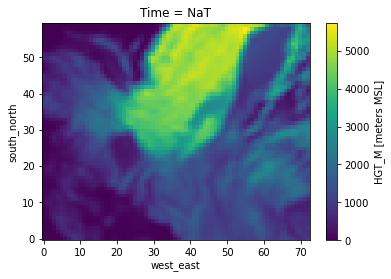

In [29]:
hgt.plot()

In [34]:
hgt.shape

(60, 73)

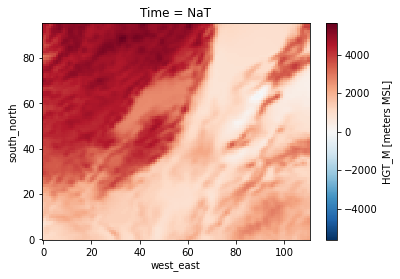

In [31]:
hgt2.plot()

In [38]:
slp

<xarray.DataArray 'HGT_M' (south_north: 60, west_east: 73)>
array([[1.0692116e+02, 3.4351146e-01, 0.0000000e+00, ..., 7.2887244e+02,
        8.3517419e+02, 9.7926984e+02],
       [1.3065327e-02, 0.0000000e+00, 0.0000000e+00, ..., 7.7577551e+02,
        8.5300342e+02, 7.5981836e+02],
       [8.4406441e-01, 8.6471635e-01, 0.0000000e+00, ..., 9.1895032e+02,
        7.8680310e+02, 7.3222949e+02],
       ...,
       [0.0000000e+00, 6.7254186e-01, 3.4578254e+00, ..., 3.4815864e+03,
        2.8931829e+03, 2.3998955e+03],
       [0.0000000e+00, 9.6193278e-01, 2.9721434e+00, ..., 3.6403970e+03,
        3.0505676e+03, 2.4190635e+03],
       [0.0000000e+00, 3.4911013e-01, 1.1165693e+00, ..., 3.4456523e+03,
        2.8191118e+03, 1.8453708e+03]], dtype=float32)
Coordinates:
    XLONG_M  (south_north, west_east) float32 120.35704 120.262695 ... 73.63446
    XLAT_M   (south_north, west_east) float32 23.853119 24.280823 ... 40.74898
    Time     datetime64[ns] NaT
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    units:        meters MSL
    description:  GMTED2010 30-arc-second topography height
    stagger:      M
    sr_x:         1
    sr_y:         1
    projection:   LambertConformal(stand_lon=-98.0, moad_cen_lat=35.000007629...

In [43]:
cart_proj

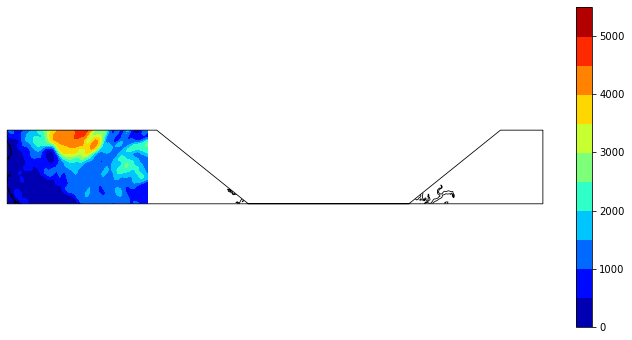

In [46]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature

from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords)

# Open the NetCDF file
ncfile = Dataset("/mnt/e/wrf_tibet/test/china/geo_em.d01.nc")

# Get the sea level pressure
slp = getvar(ncfile, "HGT_M")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the cartopy mapping object
cart_proj = get_cartopy(slp)

# Create a figure
fig = plt.figure(figsize=(12,6))
# Set the GeoAxes to the projection used by WRF
ax = plt.axes(projection=cart_proj)

# Download and add the states and coastlines
states = NaturalEarthFeature(category="cultural", scale="50m",
                             facecolor="none",
                             name="admin_1_states_provinces_shp")
ax.add_feature(states, linewidth=.5, edgecolor="black")
ax.coastlines('50m', linewidth=0.8)

# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# plt.contour(to_np(lons), to_np(lats), to_np(smooth_slp), 10, colors="black",
#             transform=crs.PlateCarree())
plt.contourf(to_np(lons), to_np(lats), to_np(smooth_slp), 10,
             transform=crs.PlateCarree(),
             cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(ax=ax, shrink=.98)

# Set the map bounds
ax.set_xlim(cartopy_xlim(smooth_slp))
ax.set_ylim(cartopy_ylim(smooth_slp))

# Add the gridlines
# ax.gridlines(color="black", linestyle="dotted")

# plt.title("Sea Level Pressure (hPa)")

plt.show()